In [1]:
import sys
sys.path.append('/public/src')
from factor_evaluation_server import FactorEvaluation,DataService # type: ignore
import numpy as np
import pandas as pd

In [2]:
ds=DataService()
df=ds['ETHUSDT_15m_2020_2025']['2021-10-01':]

In [3]:
evaluator=FactorEvaluation(df=df,future_return_periods=10)

# 定义因子！

In [6]:
@staticmethod
def factor(df, period=14):
    '''资金流量指数：结合价格和成交量的RSI变体'''
    # 计算典型价格
    typical_price = (df['high'] + df['low'] + df['close']) / 3
    
    # 计算原始资金流
    raw_money_flow = typical_price * df['volume']
    
    # 计算正向和负向资金流
    money_flow_direction = np.where(typical_price > typical_price.shift(1), 1, -1)
    positive_flow = raw_money_flow.where(money_flow_direction > 0, 0)
    negative_flow = raw_money_flow.where(money_flow_direction < 0, 0)
    
    # 计算资金比率
    money_ratio = positive_flow.rolling(period).sum() / negative_flow.rolling(period).sum()
    money_ratio = money_ratio.replace([np.inf, -np.inf], np.nan).fillna(1)
    
    # 计算MFI
    mfi = 100 - (100 / (1 + money_ratio))
    return mfi

# 测试因子表现


📊 单币种 (single) 详细评估结果:
--------------------------------------------------
🔗 相关性分析:
   IC (Pearson): 0.005430
   Rank_IC (Spearman): -0.035771
📊 信息比率:
   IR: 0.245516
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 131035
   因子列: factor
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


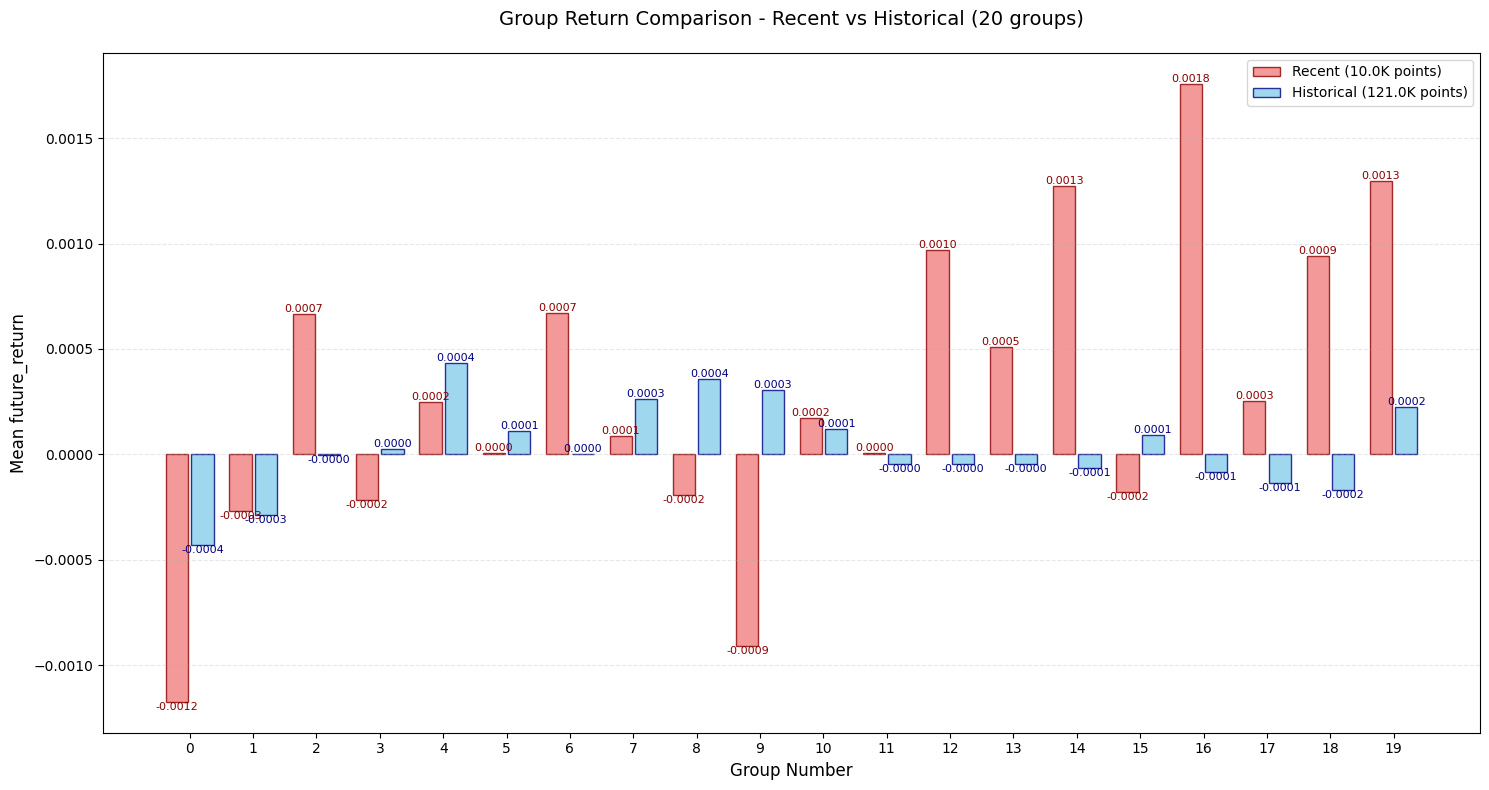

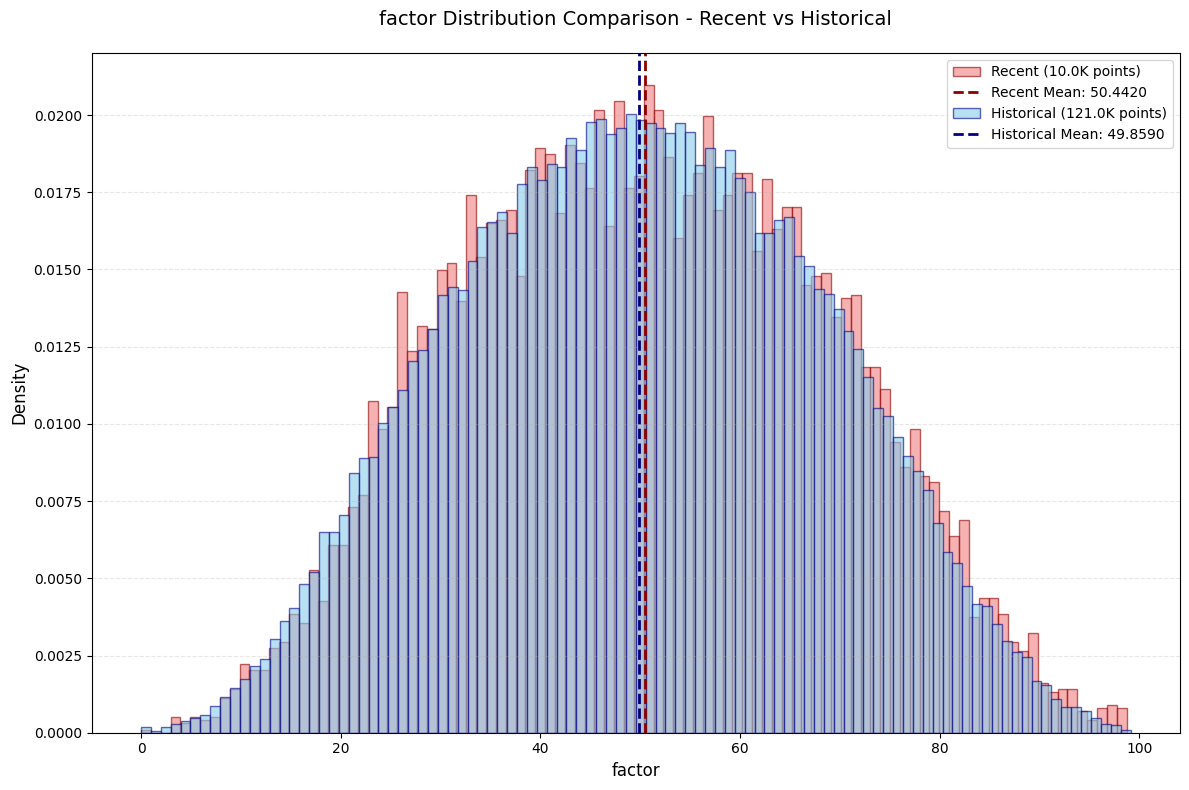

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------


In [7]:
evaluator.set_factor(
    factor_func=factor,
    factor_name='factor'
)

result=evaluator.run_full_evaluation(run_stationarity_test=False)

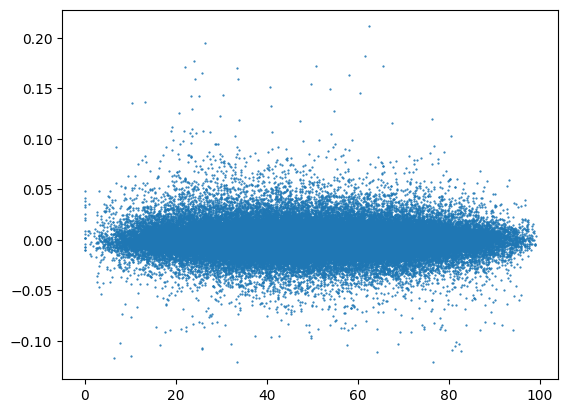

In [8]:
import matplotlib.pyplot as plt
plt.scatter(factor(df),df['close'].pct_change(-10), s=0.3)

In [9]:
result['information_ratio']['group_correlations']
# 这表示不同分组之间的相关性，通常用于评估因子在不同市场状态下的表现一致性。
# 如果相关性较高，说明因子在不同市场状态下表现一致；如果相关性较低，说明因子在不同市场状态下表现差异较大。

[0.006990722785416112,
 0.0056109487915234554,
 -0.008817593569729455,
 0.0026338574162381063,
 0.00022185568666784687,
 -0.015060478911332035,
 0.002345546526092587,
 0.004882633185460693,
 0.0035853193311103635,
 0.018732853529489772]

In [10]:
print(result)

{'correlation_analysis': {'IC': 0.005430366592166509, 'Rank_IC': -0.03577111770914994}, 'information_ratio': {'IR': 0.24551551349804568, 'group_correlations': [0.006990722785416112, 0.0056109487915234554, -0.008817593569729455, 0.0026338574162381063, 0.00022185568666784687, -0.015060478911332035, 0.002345546526092587, 0.004882633185460693, 0.0035853193311103635, 0.018732853529489772], 'n_groups': 10}, 'group_analysis': {'group_stats':        val_min  val_max  val_mean  return_mean  return_std  count
group                                                            
0       0.0000  20.5780   15.4768      -0.0005      0.0136   6552
1      20.5787  25.9421   23.4198      -0.0003      0.0137   6552
2      25.9429  29.9807   28.0280       0.0001      0.0127   6552
3      29.9822  33.4139   31.7150       0.0000      0.0121   6551
4      33.4140  36.4434   34.9503       0.0004      0.0118   6552
5      36.4434  39.3624   37.9356       0.0001      0.0111   6552
6      39.3631  42.0840   40.7270